In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import os 
import geopandas
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2
from shapely.geometry import Point
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
datafiles = ["USDA-AMS-Data-and-Metrics\\Food Access\\food_access1.csv",
            "USDA-AMS-Data-and-Metrics\\Food Access\\food_access2.csv",
            "USDA-AMS-Data-and-Metrics\\Business Development and Infrastructure\\business_development_infrastructure.csv",
            "USDA-AMS-Data-and-Metrics\\Grants\\grants.csv",
            "USDA-AMS-Data-and-Metrics\\Indicators of Community Wealth\\community_wealth.csv",
            "USDA-AMS-Data-and-Metrics\\Local Food Sales\\local_food_sales.csv"]

In [3]:
variables = ["pct_laccess_pop", 
             "food_banks", 
             "food_desert_1and10", 
             "rwj_food_environment_index",
             "retail_density_index", 
             "food_insecurity_rate", 
             "SNAP_percent_white_alone", 
             "SNAP_percent_black_alone", 
             "SNAP_percent_indian_alone", 
             "SNAP_percent_asian_alone", 
             "SNAP_percent_native_hawaiian_alone", 
             "SNAP_percent_other_race_alone", 
             "SNAP_percent_two_or_more_races", 
             "SNAP_percent_hispanic_any_race", 
             "SNAP_percent_white_alone_not_hispanic",
             "pct_laccess_white", 
             "pct_laccess_black", 
             "pct_laccess_hisp", 
             "pct_laccess_nhasian", 
             "pct_laccess_nhna", 
             "pct_laccess_nhpi", 
             "pct_laccess_multir", 
             "below_poverty_level_percent_civilian_labor_force_16_years_and_over",
             "ffrpth",
             "convspth",
             "specspth",
             "health_factors",
             "health_outcomes",
             "public_refrigerated_warehouses",
             "d2c_intermediated_p",
             "fmrktpth"]

In [4]:
full_df = pd.read_csv(datafiles[0]).dropna(subset=['county_name'])
full_df['fips'] = full_df['fips'].astype(str).str.zfill(5)
full_df = full_df.pivot(index=['fips', 'year'], columns='variable_name', values='value')
columns = [x for x in full_df.columns if x in variables]
full_df = full_df[columns]

for file in datafiles[1:]:
    #read in datasheet and drop anything that is not a county
    data = pd.read_csv(file).dropna(subset=['county_name'])
    #fix dropping of leading zero
    data['fips'] = data['fips'].astype(str).str.zfill(5)
    #create pivoted df
    pivoted_df = data.pivot(index=['fips', 'year'], columns='variable_name', values='value')
    #merge only needed vars with the full dataframe
    columns = [x for x in pivoted_df.columns if x in variables]
    full_df = full_df.combine_first(pivoted_df[columns])
full_df

C:\Users\hthog\AppData\Local\Temp\ipykernel_15564\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_15564\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_15564\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_15564\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])


variable_name  SNAP_percent_asian_alone  SNAP_percent_black_alone  \
fips  year                                                          
01001 2015                          NaN                       NaN   
      2016                          NaN                       NaN   
      2017                          0.0                     0.412   
      2018                          0.0                     0.441   
      2019                          0.0                     0.461   
...                                 ...                       ...   
72153 2022                          NaN                       NaN   
74300 2022                          NaN                       NaN   
78010 2022                          NaN                       NaN   
78020 2022                          NaN                       NaN   
78030 2022                          NaN                       NaN   

variable_name  SNAP_percent_hispanic_any_race  SNAP_percent_indian_alone  \
fips  year                                                                 
01001 2015                                NaN                        NaN   
      2016                                NaN                        NaN   
      2017                              0.014                      0.006   
      2018                              0.017                      0.007   
      2019                              0.007                      0.000   
...                                       ...                        ...   
72153 2022                                NaN                        NaN   
74300 2022                                NaN                        NaN   
78010 2022                                NaN                        NaN   
78020 2022                                NaN                        NaN   
78030 2022                                NaN                        NaN   

variable_name  SNAP_percent_native_hawaiian_alone  \
fips  year                                          
01001 2015                                    NaN   
      2016                                    NaN   
      2017                                    0.0   
      2018                                    0.0   
      2019                                    0.0   
...                                           ...   
72153 2022                                    NaN   
74300 2022                                    NaN   
78010 2022                                    NaN   
78020 2022                                    NaN   
78030 2022                                    NaN   

variable_name  SNAP_percent_other_race_alone  SNAP_percent_two_or_more_races  \
fips  year                                                                     
01001 2015                               NaN                             NaN   
      2016                               NaN                             NaN   
      2017                               0.0                           0.009   
      2018                               0.0                           0.018   
      2019                               0.0                           0.024   
...                                      ...                             ...   
72153 2022                               NaN                             NaN   
74300 2022                               NaN                             NaN   
78010 2022                               NaN                             NaN   
78020 2022                               NaN                             NaN   
78030 2022                               NaN                             NaN   

variable_name  SNAP_percent_white_alone  \
fips  year                                
01001 2015                          NaN   
      2016                          NaN   
      2017                        0.573   
      2018                        0.534   
      2019                        0.515   
...                                 ...   
72153 2022                          Na

In [5]:
states =   ['01',
            '04',
            '05',
            '06',
            '08',
            '09',
            '10',
            '12',
            '13',
            '16',
            '17',
            '18',
            '19',
            '20',
            '21',
            '23',
            '24',
            '25',
            '26',
            '27',
            '28',
            '29',
            '30',
            '31',
            '32',
            '33',
            '34',
            '35',
            '36',
            '37',
            '38',
            '39',
            '40',
            '41',
            '42',
            '44',
            '45',
            '46',
            '47',
            '48',
            '49',
            '50',
            '51',
            '53',
            '54',
            '55',
            '56',
            '22',
            '11']

In [6]:
full_df['fips_prefix'] = full_df.index.get_level_values('fips').str[:2]
df_filtered = full_df[full_df['fips_prefix'].isin(states)]

In [7]:
df_filtered = df_filtered.groupby(level='fips').ffill()
df_filtered = df_filtered.loc[df_filtered.index.get_level_values('year') == 2022]
df_filtered

variable_name  SNAP_percent_asian_alone  SNAP_percent_black_alone  \
fips  year                                                          
01001 2022                        0.000                     0.440   
01003 2022                        0.001                     0.218   
01005 2022                        0.000                     0.656   
01007 2022                        0.000                     0.500   
01009 2022                        0.000                     0.009   
...                                 ...                       ...   
56037 2022                        0.015                     0.038   
56039 2022                        0.000                     0.000   
56041 2022                        0.000                     0.000   
56043 2022                        0.000                     0.000   
56045 2022                        0.317                     0.000   

variable_name  SNAP_percent_hispanic_any_race  SNAP_percent_indian_alone  \
fips  year                                                                 
01001 2022                              0.006                      0.000   
01003 2022                              0.044                      0.035   
01005 2022                              0.055                      0.000   
01007 2022                              0.007                      0.000   
01009 2022                              0.122                      0.000   
...                                       ...                        ...   
56037 2022                              0.097                      0.060   
56039 2022                              0.000                      0.000   
56041 2022                              0.056                      0.040   
56043 2022                              0.028                      0.000   
56045 2022                              0.000                      0.000   

variable_name  SNAP_percent_native_hawaiian_alone  \
fips  year                                          
01001 2022                                    0.0   
01003 2022                                    0.0   
01005 2022                                    0.0   
01007 2022                                    0.0   
01009 2022                                    0.0   
...                                           ...   
56037 2022                                    0.0   
56039 2022                                    0.0   
56041 2022                                    0.0   
56043 2022                                    0.0   
56045 2022                                    0.0   

variable_name  SNAP_percent_other_race_alone  SNAP_percent_two_or_more_races  \
fips  year                                                                     
01001 2022                             0.000                           0.011   
01003 2022                             0.021                           0.010   
01005 2022                             0.043                           0.019   
01007 2022                             0.000                           0.000   
01009 2022                             0.007                           0.043   
...                                      ...                             ...   
56037 2022                             0.018                           0.090   
56039 2022                             0.000                           0.000   
56041 2022                             0.009                           0.020   
56043 2022                             0.028                           0.000   
56045 2022                             0.000                           0.000   

variable_name  SNAP_percent_white_alone  \
fips  year                                
01001 2022                        0.549   
01003 2022                        0.715   
01005 2022                        0.282   
01007 2022                        0.500   
01009 2022                        0.941   
...                                 ...   
56037 2022                        0.77

In [8]:
data = pd.read_csv("USDA-AMS-Data-and-Metrics\\Point level data\\point_data.csv")
data['fips'] = data['fips'].astype(str).str.zfill(5)
data

fips      state_name           county_name        lat        long  \
0      06057      California         Nevada County  39.320260 -120.150670   
1      35045      New Mexico       San Juan County  36.773792 -108.167380   
2      37099  North Carolina        Jackson County  35.322406  -83.157802   
3      19191            Iowa     Winneshiek County  43.298101  -91.787872   
4      06075      California  San Francisco County  37.750507 -122.389110   
...      ...             ...                   ...        ...         ...   
12989  32003          Nevada          Clark County  36.142355 -115.206409   
12990  32003          Nevada          Clark County  36.117236 -115.158173   
12991  34007      New Jersey         Camden County  39.939428  -75.015417   
12992  06029      California           Kern County  35.339951 -119.035082   
12993  23029           Maine     Washington County  44.708803  -67.458025   

                        org_type                   variable_name  
0                       Food Hub               location_food_hub  
1                       Food Hub               location_food_hub  
2                       Food Hub               location_food_hub  
3                       Food Hub               location_food_hub  
4                       Food Hub               location_food_hub  
...                          ...                             ...  
12989  Colleges and universities  location_colleges_universities  
12990  Colleges and universities  location_colleges_universities  
12991  Colleges and universities  location_colleges_universities  
12992  Colleges and universities  location_colleges_universities  
12993  Colleges and universities  location_colleges_universities  

[12994 rows x 7 columns]

In [9]:
filename = "countiesWithStatesAndPopulation.shp"
map_data = geopandas.read_file(filename = filename)
map_data["FIPS"] = map_data["STATEFP"].astype(str) + map_data["COUNTYFP"].astype(str)
map_data['FIPS'] = map_data['FIPS'].astype(str).str.zfill(5)
map_data = map_data.set_index("FIPS")
map_data = map_data[["NAME", "State", "geometry"]]
map_data = map_data.sort_index()
map_data

NAME    State                                           geometry
FIPS                                                                         
01001     Autauga  Alabama  POLYGON ((-86.92120 32.65754, -86.92035 32.658...
01003     Baldwin  Alabama  POLYGON ((-88.02858 30.22676, -88.02399 30.230...
01005     Barbour  Alabama  POLYGON ((-85.74803 31.61918, -85.74544 31.618...
01007        Bibb  Alabama  POLYGON ((-87.42194 33.00338, -87.31854 33.006...
01009      Blount  Alabama  POLYGON ((-86.96336 33.85822, -86.95967 33.857...
...           ...      ...                                                ...
56037  Sweetwater  Wyoming  POLYGON ((-110.05438 42.01103, -110.05436 42.0...
56039       Teton  Wyoming  POLYGON ((-111.05361 44.66627, -110.75076 44.6...
56041       Uinta  Wyoming  POLYGON ((-111.04662 41.15604, -111.04659 41.2...
56043    Washakie  Wyoming  POLYGON ((-108.55056 44.16845, -108.50652 44.1...
56045      Weston  Wyoming  POLYGON ((-105.08078 43.96622, -105.07928 44.1...

[3142 rows x 3 columns]

In [10]:
# map_data["Centroid"] = map_data["geometry"].centroid
# map_data["Rep Point"] = map_data["geometry"].representative_point()
filename = "Centers of Population.csv"
centers = pd.read_csv(filename)
centers["FIPS"] = centers["STATEFP"].astype(str).str.zfill(2) + centers["COUNTYFP"].astype(str).str.zfill(3)
centers = centers.set_index("FIPS")
map_data[["LATITUDE","LONGITUDE"]] = centers[["LATITUDE","LONGITUDE"]]
map_data["center"] = map_data.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
map_data.dropna(inplace = True)
map_data

C:\Users\hthog\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


NAME    State                                           geometry  \
FIPS                                                                            
01001     Autauga  Alabama  POLYGON ((-86.92120 32.65754, -86.92035 32.658...   
01003     Baldwin  Alabama  POLYGON ((-88.02858 30.22676, -88.02399 30.230...   
01005     Barbour  Alabama  POLYGON ((-85.74803 31.61918, -85.74544 31.618...   
01007        Bibb  Alabama  POLYGON ((-87.42194 33.00338, -87.31854 33.006...   
01009      Blount  Alabama  POLYGON ((-86.96336 33.85822, -86.95967 33.857...   
...           ...      ...                                                ...   
56037  Sweetwater  Wyoming  POLYGON ((-110.05438 42.01103, -110.05436 42.0...   
56039       Teton  Wyoming  POLYGON ((-111.05361 44.66627, -110.75076 44.6...   
56041       Uinta  Wyoming  POLYGON ((-111.04662 41.15604, -111.04659 41.2...   
56043    Washakie  Wyoming  POLYGON ((-108.55056 44.16845, -108.50652 44.1...   
56045      Weston  Wyoming  POLYGON ((-105.08078 43.96622, -105.07928 44.1...   

        LATITUDE   LONGITUDE                       center  
FIPS                                                       
01001  32.500194  -86.487813   POINT (-86.48781 32.50019)  
01003  30.537396  -87.761478   POINT (-87.76148 30.53740)  
01005  31.843981  -85.301306   POINT (-85.30131 31.84398)  
01007  33.032236  -87.136826   POINT (-87.13683 33.03224)  
01009  33.954604  -86.592667   POINT (-86.59267 33.95460)  
...          ...         ...                          ...  
56037  41.580564 -109.302521  POINT (-109.30252 41.58056)  
56039  43.491744 -110.785815  POINT (-110.78581 43.49174)  
56041  41.271502 -110.760395  POINT (-110.76040 41.27150)  
56043  44.012223 -107.905059  POINT (-107.90506 44.01222)  
56045  43.908449 -104.304384  POINT (-104.30438 43.90845)  

[3141 rows x 6 columns]

In [11]:
df_filtered.reset_index(level='year', inplace=True)
df_filtered[["geometry","center"]] = map_data[["geometry", "center"]]

In [12]:
df_filtered = df_filtered.dropna(subset=["geometry", "center"])
df_filtered

variable_name  year  SNAP_percent_asian_alone  SNAP_percent_black_alone  \
fips                                                                      
01001          2022                     0.000                     0.440   
01003          2022                     0.001                     0.218   
01005          2022                     0.000                     0.656   
01007          2022                     0.000                     0.500   
01009          2022                     0.000                     0.009   
...             ...                       ...                       ...   
56037          2022                     0.015                     0.038   
56039          2022                     0.000                     0.000   
56041          2022                     0.000                     0.000   
56043          2022                     0.000                     0.000   
56045          2022                     0.317                     0.000   

variable_name  SNAP_percent_hispanic_any_race  SNAP_percent_indian_alone  \
fips                                                                       
01001                                   0.006                      0.000   
01003                                   0.044                      0.035   
01005                                   0.055                      0.000   
01007                                   0.007                      0.000   
01009                                   0.122                      0.000   
...                                       ...                        ...   
56037                                   0.097                      0.060   
56039                                   0.000                      0.000   
56041                                   0.056                      0.040   
56043                                   0.028                      0.000   
56045                                   0.000                      0.000   

variable_name  SNAP_percent_native_hawaiian_alone  \
fips                                                
01001                                         0.0   
01003                                         0.0   
01005                                         0.0   
01007                                         0.0   
01009                                         0.0   
...                                           ...   
56037                                         0.0   
56039                                         0.0   
56041                                         0.0   
56043                                         0.0   
56045                                         0.0   

variable_name  SNAP_percent_other_race_alone  SNAP_percent_two_or_more_races  \
fips                                                                           
01001                                  0.000                           0.011   
01003                                  0.021                           0.010   
01005                                  0.043                           0.019   
01007                                  0.000                           0.000   
01009                                  0.007                           0.043   
...                                      ...                             ...   
56037                                  0.018                           0.090   
56039                                  0.000                           0.000   
56041                                  0.009                           0.020   
56043                                  0.028                           0.000   
56045                                  0.000                           0.000   

variable_name  SNAP_percent_white_alone  \
fips                                      
01001                             0.549   
01003                             0.715   
01005                             0.282   
01007                             0.500   
01009                             0.941   
...

In [13]:
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # Radius of the Earth in kilometers
    earth_radius = 6371

    # Calculate the differences between the latitudes and longitudes
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    # Apply the Haversine formula
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = earth_radius * c

    return distance

In [14]:
# Initialize the counts as zero
df_filtered["college_region"] = 0
df_filtered["csa_region"] = 0
df_filtered["fm_region"] = 0
df_filtered["fh_region"] = 0
df_filtered["mp_region"] = 0

# Filter the data DataFrame by org_type once
colleges = data[data["org_type"] == "Colleges and universities"]
csas = data[data["org_type"] == "Community Supported Agriculture (CSA)"]
farmers_markets = data[data["org_type"] == "Farmers Market"]
food_hubs = data[data["org_type"] == "Food Hub"]
meat_processors = data[data["org_type"] == "Meat processor"]

for i, row in df_filtered.iterrows():
    point1x = row["center"].x
    point1y = row["center"].y

    # Calculate distances for each org_type and count within the given distance threshold
    college_count = ((calculate_distance(point1y, point1x, colleges["lat"], colleges["long"]) <= 563.2704).sum())
    csa_count = ((calculate_distance(point1y, point1x, csas["lat"], csas["long"]) <= 563.2704).sum())
    fm_count = ((calculate_distance(point1y, point1x, farmers_markets["lat"], farmers_markets["long"]) <= 563.2704).sum())
    fh_count = ((calculate_distance(point1y, point1x, food_hubs["lat"], food_hubs["long"]) <= 563.2704).sum())
    mp_count = ((calculate_distance(point1y, point1x, meat_processors["lat"], meat_processors["long"]) <= 563.2704).sum())

    # Assign the counts to the respective columns
    df_filtered.at[i, "college_region"] = college_count
    df_filtered.at[i, "csa_region"] = csa_count
    df_filtered.at[i, "fm_region"] = fm_count
    df_filtered.at[i, "fh_region"] = fh_count
    df_filtered.at[i, "mp_region"] = mp_count

C:\Users\hthog\AppData\Local\Temp\ipykernel_15564\1880503623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["college_region"] = 0
C:\Users\hthog\AppData\Local\Temp\ipykernel_15564\1880503623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["csa_region"] = 0
C:\Users\hthog\AppData\Local\Temp\ipykernel_15564\1880503623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [15]:
income_data = pd.read_excel("Unemployment.xlsx")
income_data["FIPS"] = income_data["FIPS_Code"].astype(str).str.zfill(5)
income_data = income_data.set_index("FIPS")
income_data

FIPS_Code State                Area_Name  \
FIPS                                              
00000          0    US            United States   
01000       1000    AL                  Alabama   
01001       1001    AL       Autauga County, AL   
01003       1003    AL       Baldwin County, AL   
01005       1005    AL       Barbour County, AL   
...          ...   ...                      ...   
72145      72145    PR  Vega Baja Municipio, PR   
72147      72147    PR    Vieques Municipio, PR   
72149      72149    PR   Villalba Municipio, PR   
72151      72151    PR    Yabucoa Municipio, PR   
72153      72153    PR      Yauco Municipio, PR   

       Rural_Urban_Continuum_Code_2013  Urban_Influence_Code_2013  Metro_2013  \
FIPS                                                                            
00000                              NaN                        NaN         NaN   
01000                              NaN                        NaN         NaN   
01001                              2.0                        2.0         1.0   
01003                              3.0                        2.0         1.0   
01005                              6.0                        6.0         0.0   
...                                ...                        ...         ...   
72145                              1.0                        1.0         1.0   
72147                              7.0                       12.0         0.0   
72149                              2.0                        2.0         1.0   
72151                              1.0                        1.0         1.0   
72153                              2.0                        2.0         1.0   

       Unemployment_rate_2022  Median_Household_Income_2021  \
FIPS                                                          
00000                     3.7                       69717.0   
01000                     2.6                       53990.0   
01001                     2.3                       66444.0   
01003                     2.4                       65658.0   
01005                     4.1                       38649.0   
...                       ...                           ...   
72145                     7.4                           NaN   
72147                     6.9                           NaN   
72149                    10.4                           NaN   
72151                     8.3                           NaN   
72153                    10.3                           NaN   

       Med_HH_Income_Percent_of_State_Total_2021  
FIPS                                              
00000                                        NaN  
01000                                      100.0  
01001                                      123.1  
01003                                      121.6  
01005                                       71.6  
...                                          ...  
72145                                        NaN  
72147                                        NaN  
72149                                        NaN  
72151                                        NaN  
72153                                        NaN  

[3277 rows x 9 columns]

In [16]:
df_filtered[["Income", "Unemployment"]] = income_data[["Median_Household_Income_2021", "Unemployment_rate_2022"]]
df_filtered

C:\Users\hthog\AppData\Local\Temp\ipykernel_15564\275466645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[["Income", "Unemployment"]] = income_data[["Median_Household_Income_2021", "Unemployment_rate_2022"]]
C:\Users\hthog\AppData\Local\Temp\ipykernel_15564\275466645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[["Income", "Unemployment"]] = income_data[["Median_Household_Income_2021", "Unemployment_rate_2022"]]


variable_name  year  SNAP_percent_asian_alone  SNAP_percent_black_alone  \
fips                                                                      
01001          2022                     0.000                     0.440   
01003          2022                     0.001                     0.218   
01005          2022                     0.000                     0.656   
01007          2022                     0.000                     0.500   
01009          2022                     0.000                     0.009   
...             ...                       ...                       ...   
56037          2022                     0.015                     0.038   
56039          2022                     0.000                     0.000   
56041          2022                     0.000                     0.000   
56043          2022                     0.000                     0.000   
56045          2022                     0.317                     0.000   

variable_name  SNAP_percent_hispanic_any_race  SNAP_percent_indian_alone  \
fips                                                                       
01001                                   0.006                      0.000   
01003                                   0.044                      0.035   
01005                                   0.055                      0.000   
01007                                   0.007                      0.000   
01009                                   0.122                      0.000   
...                                       ...                        ...   
56037                                   0.097                      0.060   
56039                                   0.000                      0.000   
56041                                   0.056                      0.040   
56043                                   0.028                      0.000   
56045                                   0.000                      0.000   

variable_name  SNAP_percent_native_hawaiian_alone  \
fips                                                
01001                                         0.0   
01003                                         0.0   
01005                                         0.0   
01007                                         0.0   
01009                                         0.0   
...                                           ...   
56037                                         0.0   
56039                                         0.0   
56041                                         0.0   
56043                                         0.0   
56045                                         0.0   

variable_name  SNAP_percent_other_race_alone  SNAP_percent_two_or_more_races  \
fips                                                                           
01001                                  0.000                           0.011   
01003                                  0.021                           0.010   
01005                                  0.043                           0.019   
01007                                  0.000                           0.000   
01009                                  0.007                           0.043   
...                                      ...                             ...   
56037                                  0.018                           0.090   
56039                                  0.000                           0.000   
56041                                  0.009                           0.020   
56043                                  0.028                           0.000   
56045                                  0.000                           0.000   

variable_name  SNAP_percent_white_alone  \
fips                                      
01001                             0.549   
01003                             0.715   
01005                             0.282   
01007                             0.500   
01009                             0.941   
...

In [17]:
def calculate_difference(row):
    maximum = row.max()
    minimum = row.min()
    return 1 - (maximum - minimum)

df_filtered['SNAP Inequality'] = df_filtered[["SNAP_percent_white_alone",
                                           "SNAP_percent_black_alone",
                                           "SNAP_percent_indian_alone",
                                           "SNAP_percent_asian_alone",
                                           "SNAP_percent_native_hawaiian_alone",
                                           "SNAP_percent_other_race_alone",
                                           "SNAP_percent_two_or_more_races",
                                           "SNAP_percent_hispanic_any_race",
                                           "SNAP_percent_white_alone_not_hispanic",
                                           ]].apply(calculate_difference, axis=1)
df_filtered['LAccess Inequality'] = df_filtered[["pct_laccess_white", 
                                               "pct_laccess_black", 
                                               "pct_laccess_hisp", 
                                               "pct_laccess_nhasian", 
                                               "pct_laccess_nhna", 
                                               "pct_laccess_nhpi", 
                                               "pct_laccess_multir"
                                                ]].apply(calculate_difference, axis=1)

df_filtered

C:\Users\hthog\AppData\Local\Temp\ipykernel_15564\3281561334.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SNAP Inequality'] = df_filtered[["SNAP_percent_white_alone",
C:\Users\hthog\AppData\Local\Temp\ipykernel_15564\3281561334.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['LAccess Inequality'] = df_filtered[["pct_laccess_white",


variable_name  year  SNAP_percent_asian_alone  SNAP_percent_black_alone  \
fips                                                                      
01001          2022                     0.000                     0.440   
01003          2022                     0.001                     0.218   
01005          2022                     0.000                     0.656   
01007          2022                     0.000                     0.500   
01009          2022                     0.000                     0.009   
...             ...                       ...                       ...   
56037          2022                     0.015                     0.038   
56039          2022                     0.000                     0.000   
56041          2022                     0.000                     0.000   
56043          2022                     0.000                     0.000   
56045          2022                     0.317                     0.000   

variable_name  SNAP_percent_hispanic_any_race  SNAP_percent_indian_alone  \
fips                                                                       
01001                                   0.006                      0.000   
01003                                   0.044                      0.035   
01005                                   0.055                      0.000   
01007                                   0.007                      0.000   
01009                                   0.122                      0.000   
...                                       ...                        ...   
56037                                   0.097                      0.060   
56039                                   0.000                      0.000   
56041                                   0.056                      0.040   
56043                                   0.028                      0.000   
56045                                   0.000                      0.000   

variable_name  SNAP_percent_native_hawaiian_alone  \
fips                                                
01001                                         0.0   
01003                                         0.0   
01005                                         0.0   
01007                                         0.0   
01009                                         0.0   
...                                           ...   
56037                                         0.0   
56039                                         0.0   
56041                                         0.0   
56043                                         0.0   
56045                                         0.0   

variable_name  SNAP_percent_other_race_alone  SNAP_percent_two_or_more_races  \
fips                                                                           
01001                                  0.000                           0.011   
01003                                  0.021                           0.010   
01005                                  0.043                           0.019   
01007                                  0.000                           0.000   
01009                                  0.007                           0.043   
...                                      ...                             ...   
56037                                  0.018                           0.090   
56039                                  0.000                           0.000   
56041                                  0.009                           0.020   
56043                                  0.028                           0.000   
56045                                  0.000                           0.000   

variable_name  SNAP_percent_white_alone  \
fips                                      
01001                             0.549   
01003                             0.715   
01005                             0.282   
01007                             0.500   
01009                             0.941   
...

In [18]:
gini_df = pd.read_csv("GINI.csv")
gini_df["FIPS"] = gini_df["FIPS"].astype(str).str.zfill(5)
gini_df = gini_df.set_index("FIPS")
df_filtered["Gini"] = 1 - gini_df["Gini Index"]
df_filtered

C:\Users\hthog\AppData\Local\Temp\ipykernel_15564\2083374318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Gini"] = 1 - gini_df["Gini Index"]


variable_name  year  SNAP_percent_asian_alone  SNAP_percent_black_alone  \
fips                                                                      
01001          2022                     0.000                     0.440   
01003          2022                     0.001                     0.218   
01005          2022                     0.000                     0.656   
01007          2022                     0.000                     0.500   
01009          2022                     0.000                     0.009   
...             ...                       ...                       ...   
56037          2022                     0.015                     0.038   
56039          2022                     0.000                     0.000   
56041          2022                     0.000                     0.000   
56043          2022                     0.000                     0.000   
56045          2022                     0.317                     0.000   

variable_name  SNAP_percent_hispanic_any_race  SNAP_percent_indian_alone  \
fips                                                                       
01001                                   0.006                      0.000   
01003                                   0.044                      0.035   
01005                                   0.055                      0.000   
01007                                   0.007                      0.000   
01009                                   0.122                      0.000   
...                                       ...                        ...   
56037                                   0.097                      0.060   
56039                                   0.000                      0.000   
56041                                   0.056                      0.040   
56043                                   0.028                      0.000   
56045                                   0.000                      0.000   

variable_name  SNAP_percent_native_hawaiian_alone  \
fips                                                
01001                                         0.0   
01003                                         0.0   
01005                                         0.0   
01007                                         0.0   
01009                                         0.0   
...                                           ...   
56037                                         0.0   
56039                                         0.0   
56041                                         0.0   
56043                                         0.0   
56045                                         0.0   

variable_name  SNAP_percent_other_race_alone  SNAP_percent_two_or_more_races  \
fips                                                                           
01001                                  0.000                           0.011   
01003                                  0.021                           0.010   
01005                                  0.043                           0.019   
01007                                  0.000                           0.000   
01009                                  0.007                           0.043   
...                                      ...                             ...   
56037                                  0.018                           0.090   
56039                                  0.000                           0.000   
56041                                  0.009                           0.020   
56043                                  0.028                           0.000   
56045                                  0.000                           0.000   

variable_name  SNAP_percent_white_alone  \
fips                                      
01001                             0.549   
01003                             0.715   
01005                             0.282   
01007                             0.500   
01009                             0.941   
...

In [19]:
df_filtered.to_excel("50 States Data with Points.xlsx")

In [20]:
subdf = df_filtered.drop(["geometry", "center", "year", "fips_prefix","SNAP_percent_white_alone",
                        "SNAP_percent_black_alone",
                        "SNAP_percent_indian_alone",
                        "SNAP_percent_asian_alone",
                        "SNAP_percent_native_hawaiian_alone",
                        "SNAP_percent_other_race_alone",
                        "SNAP_percent_two_or_more_races",
                        "SNAP_percent_hispanic_any_race",
                        "SNAP_percent_white_alone_not_hispanic",
                        "pct_laccess_white", 
                        "pct_laccess_black", 
                        "pct_laccess_hisp", 
                        "pct_laccess_nhasian", 
                        "pct_laccess_nhna", 
                        "pct_laccess_nhpi", 
                        "pct_laccess_multir"], axis=1)
subdf.describe()

variable_name  below_poverty_level_percent_civilian_labor_force_16_years_and_over  \
count                                                3108.000000                    
mean                                                    0.082892                    
std                                                     0.037930                    
min                                                     0.000000                    
25%                                                     0.057000                    
50%                                                     0.077000                    
75%                                                     0.101000                    
max                                                     0.321000                    

variable_name     convspth  d2c_intermediated_p       ffrpth     fmrktpth  \
count          3107.000000          3068.000000  3107.000000  3107.000000   
mean              0.599469             0.009075     0.587424     0.059175   
std               0.302311             0.018828     0.305823     0.100245   
min               0.000000             0.000000     0.000000     0.000000   
25%               0.407120             0.000000     0.424287     0.000000   
50%               0.544983             0.003215     0.590354     0.029973   
75%               0.724557             0.009710     0.748263     0.071479   
max               3.680982             0.312500     5.805515     1.472754   

variable_name   food_banks  food_desert_1and10  food_insecurity_rate  \
count          3107.000000         3108.000000           3108.000000   
mean              0.086257            2.969112              0.130858   
std               0.280788            6.749293              0.037075   
min               0.000000            0.000000              0.029000   
25%               0.000000            0.000000              0.105000   
50%               0.000000            1.000000              0.129000   
75%               0.000000            3.000000              0.156000   
max               1.000000          120.000000              0.294000   

variable_name  health_factors  health_outcomes  ...  college_region  \
count             3068.000000      3068.000000  ...     3108.000000   
mean                 0.005050         0.007527  ...      765.917954   
std                  0.470934         0.709858  ...      465.566984   
min                 -2.098312        -2.820513  ...       41.000000   
25%                 -0.279681        -0.413722  ...      379.750000   
50%                  0.000000         0.025206  ...      697.500000   
75%                  0.298288         0.481386  ...     1102.250000   
max                  2.203190         2.797310  ...     1905.000000   

variable_name   csa_region    fm_region    fh_region    mp_region  \
count          3108.000000  3108.000000  3108.000000  3108.000000   
mean             11.574968   101.162484     2.316924   707.120335   
std               9.555650    68.601523     1.569629   403.996597   
min               0.000000     5.000000     0.000000    40.000000   
25%               3.000000    43.000000     1.000000   377.000000   
50%               9.000000    78.000000     2.000000   630.000000   
75%              20.000000   168.250000     3.000000  1051.000000   
max              37.000000   240.000000     6.000000  1630.000000   

variable_name         Income  Unemployment  SNAP Inequality  \
count            3108.000000   3108.000000      3108.000000   
mean            58806.916345      3.575644         0.192690   
std             15231.294152      1.202423         0.158799   
min             25653.000000      0.600000         0.000000   
25%             48955.250000      2.700000         0.057000   
50%             56532.000000      3.400000         0.147000   
75%             65458.500000      4.200000         0.310000   
max            153716.000000     14.700000         0.732000   

variable_name  LAccess Inequality         Gini  
count       

In [21]:
subdf[["food_insecurity_rate", "pct_laccess_pop",
      "below_poverty_level_percent_civilian_labor_force_16_years_and_over"]] = 1 - subdf[["food_insecurity_rate", 
                                                                                          "pct_laccess_pop",
                                                                                         "below_poverty_level_percent_civilian_labor_force_16_years_and_over"]]
subdf["Unemployment"] = 1 - (subdf["Unemployment"] / 100)

subdf.describe()

variable_name  below_poverty_level_percent_civilian_labor_force_16_years_and_over  \
count                                                3108.000000                    
mean                                                    0.917108                    
std                                                     0.037930                    
min                                                     0.679000                    
25%                                                     0.899000                    
50%                                                     0.923000                    
75%                                                     0.943000                    
max                                                     1.000000                    

variable_name     convspth  d2c_intermediated_p       ffrpth     fmrktpth  \
count          3107.000000          3068.000000  3107.000000  3107.000000   
mean              0.599469             0.009075     0.587424     0.059175   
std               0.302311             0.018828     0.305823     0.100245   
min               0.000000             0.000000     0.000000     0.000000   
25%               0.407120             0.000000     0.424287     0.000000   
50%               0.544983             0.003215     0.590354     0.029973   
75%               0.724557             0.009710     0.748263     0.071479   
max               3.680982             0.312500     5.805515     1.472754   

variable_name   food_banks  food_desert_1and10  food_insecurity_rate  \
count          3107.000000         3108.000000           3108.000000   
mean              0.086257            2.969112              0.869142   
std               0.280788            6.749293              0.037075   
min               0.000000            0.000000              0.706000   
25%               0.000000            0.000000              0.844000   
50%               0.000000            1.000000              0.871000   
75%               0.000000            3.000000              0.895000   
max               1.000000          120.000000              0.971000   

variable_name  health_factors  health_outcomes  ...  college_region  \
count             3068.000000      3068.000000  ...     3108.000000   
mean                 0.005050         0.007527  ...      765.917954   
std                  0.470934         0.709858  ...      465.566984   
min                 -2.098312        -2.820513  ...       41.000000   
25%                 -0.279681        -0.413722  ...      379.750000   
50%                  0.000000         0.025206  ...      697.500000   
75%                  0.298288         0.481386  ...     1102.250000   
max                  2.203190         2.797310  ...     1905.000000   

variable_name   csa_region    fm_region    fh_region    mp_region  \
count          3108.000000  3108.000000  3108.000000  3108.000000   
mean             11.574968   101.162484     2.316924   707.120335   
std               9.555650    68.601523     1.569629   403.996597   
min               0.000000     5.000000     0.000000    40.000000   
25%               3.000000    43.000000     1.000000   377.000000   
50%               9.000000    78.000000     2.000000   630.000000   
75%              20.000000   168.250000     3.000000  1051.000000   
max              37.000000   240.000000     6.000000  1630.000000   

variable_name         Income  Unemployment  SNAP Inequality  \
count            3108.000000   3108.000000      3108.000000   
mean            58806.916345      0.964244         0.192690   
std             15231.294152      0.012024         0.158799   
min             25653.000000      0.853000         0.000000   
25%             48955.250000      0.958000         0.057000   
50%             56532.000000      0.966000         0.147000   
75%             65458.500000      0.973000         0.310000   
max            153716.000000      0.994000         0.732000   

variable_name  LAccess Inequality         Gini  
count       

In [22]:
df_zscore = (subdf - subdf.mean()) / subdf.std(ddof=0)
df_zscore

variable_name  below_poverty_level_percent_civilian_labor_force_16_years_and_over  \
fips                                                                                
01001                                                   0.287193                    
01003                                                   0.788192                    
01005                                                  -1.347645                    
01007                                                   0.498140                    
01009                                                   0.814560                    
...                                                          ...                    
56037                                                   0.102614                    
56039                                                   0.445403                    
56041                                                   0.524508                    
56043                                                  -0.345648                    
56045                                                   0.709087                    

variable_name  convspth  d2c_intermediated_p    ffrpth  fmrktpth  food_banks  \
fips                                                                           
01001         -0.127926            -0.482081  0.682049 -0.410957   -0.307245   
01003         -0.101961            -0.292819  0.537491 -0.407350   -0.307245   
01005          0.455590            -0.268749  0.997300  1.013576   -0.307245   
01007          0.209354            -0.482081 -0.909628 -0.144991   -0.307245   
01009         -0.431445            -0.064911 -0.614357 -0.417903   -0.307245   
...                 ...                  ...       ...       ...         ...   
56037         -0.338241            -0.482081  0.370275 -0.126896   -0.307245   
56039          0.728515            -0.107999  0.900629  0.706398   -0.307245   
56041          0.093352             0.045161  0.763296  0.392618   -0.307245   
56043         -0.771115            -0.050214  0.475371  1.940260   -0.307245   
56045         -0.144772            -0.482081 -0.103716  2.273710   -0.307245   

variable_name  food_desert_1and10  food_insecurity_rate  health_factors  \
fips                                                                      
01001                    0.300952             -0.705218        1.059607   
01003                    0.152765             -0.084757        1.694824   
01005                    0.152765             -2.054045       -0.835953   
01007                   -0.439985             -0.867077       -0.630195   
01009                   -0.439985             -0.381499        0.838562   
...                           ...                   ...             ...   
56037                   -0.439985              0.481750       -1.003946   
56039                   -0.439985              1.102210        1.570932   
56041                   -0.439985              0.131055        0.264919   
56043                   -0.439985              0.400820        0.312365   
56045                   -0.439985              0.238961       -0.121154   

variable_name  health_outcomes  ...  college_region  csa_region  fm_region  \
fips                            ...                                          
01001                 0.837942  ...       -0.208205   -1.002183  -0.716754   
01003                 1.895617  ...       -0.685120   -1.106850  -1.022919   
01005                 0.031460  ...       -0.098644   -0.897516  -0.731333   
01007                -0.909985  ...       -0.178130   -1.002183  -0.643857   
01009                 1.160320  ...        0.017362   -0.688182  -0.410589   
...                        ...  ...             ...         ...        ...   
56037                -0.628180  ...       -1.228631   -0.792849  -1.168711   
56039                 2.503653  ...       -1.370416   -0.688182  -1.299925   
56041                -0.869398  ...       -1.230779   -0.688182  -1.227029   
56043              

In [23]:
subdf["retail_density_index"].describe()

count    3107.000000
mean        0.179630
std         0.079458
min         0.000000
25%         0.130130
50%         0.162014
75%         0.208836
max         1.000000
Name: retail_density_index, dtype: float64

In [24]:
df_zscore["retail_density_index"].describe()

count    3.107000e+03
mean     4.116437e-16
std      1.000161e+00
min     -2.261065e+00
25%     -6.230768e-01
50%     -2.217369e-01
75%      3.676308e-01
max      1.032628e+01
Name: retail_density_index, dtype: float64

In [25]:
df_zscore.isnull().sum()

variable_name
below_poverty_level_percent_civilian_labor_force_16_years_and_over     0
convspth                                                               1
d2c_intermediated_p                                                   40
ffrpth                                                                 1
fmrktpth                                                               1
food_banks                                                             1
food_desert_1and10                                                     0
food_insecurity_rate                                                   0
health_factors                                                        40
health_outcomes                                                       40
pct_laccess_pop                                                       20
retail_density_index                                                   1
rwj_food_environment_index                                            19
specspth                             

In [26]:
#make bad vars the opposite 
df_zscore[["food_desert_1and10",
           "ffrpth",
           "convspth"]] = df_zscore[["food_desert_1and10",
           "ffrpth",
           "convspth"]] * (-1)
df_zscore

variable_name  below_poverty_level_percent_civilian_labor_force_16_years_and_over  \
fips                                                                                
01001                                                   0.287193                    
01003                                                   0.788192                    
01005                                                  -1.347645                    
01007                                                   0.498140                    
01009                                                   0.814560                    
...                                                          ...                    
56037                                                   0.102614                    
56039                                                   0.445403                    
56041                                                   0.524508                    
56043                                                  -0.345648                    
56045                                                   0.709087                    

variable_name  convspth  d2c_intermediated_p    ffrpth  fmrktpth  food_banks  \
fips                                                                           
01001          0.127926            -0.482081 -0.682049 -0.410957   -0.307245   
01003          0.101961            -0.292819 -0.537491 -0.407350   -0.307245   
01005         -0.455590            -0.268749 -0.997300  1.013576   -0.307245   
01007         -0.209354            -0.482081  0.909628 -0.144991   -0.307245   
01009          0.431445            -0.064911  0.614357 -0.417903   -0.307245   
...                 ...                  ...       ...       ...         ...   
56037          0.338241            -0.482081 -0.370275 -0.126896   -0.307245   
56039         -0.728515            -0.107999 -0.900629  0.706398   -0.307245   
56041         -0.093352             0.045161 -0.763296  0.392618   -0.307245   
56043          0.771115            -0.050214 -0.475371  1.940260   -0.307245   
56045          0.144772            -0.482081  0.103716  2.273710   -0.307245   

variable_name  food_desert_1and10  food_insecurity_rate  health_factors  \
fips                                                                      
01001                   -0.300952             -0.705218        1.059607   
01003                   -0.152765             -0.084757        1.694824   
01005                   -0.152765             -2.054045       -0.835953   
01007                    0.439985             -0.867077       -0.630195   
01009                    0.439985             -0.381499        0.838562   
...                           ...                   ...             ...   
56037                    0.439985              0.481750       -1.003946   
56039                    0.439985              1.102210        1.570932   
56041                    0.439985              0.131055        0.264919   
56043                    0.439985              0.400820        0.312365   
56045                    0.439985              0.238961       -0.121154   

variable_name  health_outcomes  ...  college_region  csa_region  fm_region  \
fips                            ...                                          
01001                 0.837942  ...       -0.208205   -1.002183  -0.716754   
01003                 1.895617  ...       -0.685120   -1.106850  -1.022919   
01005                 0.031460  ...       -0.098644   -0.897516  -0.731333   
01007                -0.909985  ...       -0.178130   -1.002183  -0.643857   
01009                 1.160320  ...        0.017362   -0.688182  -0.410589   
...                        ...  ...             ...         ...        ...   
56037                -0.628180  ...       -1.228631   -0.792849  -1.168711   
56039                 2.503653  ...       -1.370416   -0.688182  -1.299925   
56041                -0.869398  ...       -1.230779   -0.688182  -1.227029   
56043              

In [27]:
min_ = df_zscore.describe().loc["min"].min() 
max_ = df_zscore.describe().loc["max"].max()
min_, max_

(-17.34251569003561, 16.117830596111247)

In [28]:
index_dict = {"Accessibility":["pct_laccess_pop",
                              "food_banks",
                              "food_desert_1and10",
                               "rwj_food_environment_index",
                              "retail_density_index",
                              "food_insecurity_rate"],
             "Inequality":["SNAP Inequality",
                          "LAccess Inequality",
                          "Gini"],
             "Affordability":["below_poverty_level_percent_civilian_labor_force_16_years_and_over",
                             "Income",
                             "Unemployment"],
             "Nutritional Quality":["ffrpth",
                                   "convspth",
                                   "specspth",
                                   "health_factors",
                                   "health_outcomes"],
             "Infrastructure":["d2c_intermediated_p",
                              "csa_region",
                              "fm_region",
                              "fh_region",
                              "mp_region"]}

In [29]:
df_zscore["Accessibility"] = np.nanmean(df_zscore[index_dict["Accessibility"]], axis=1)
df_zscore["Inequality"] = np.nanmean(df_zscore[index_dict["Inequality"]], axis=1)
df_zscore["Affordability"] = np.nanmean(df_zscore[index_dict["Affordability"]], axis=1)
df_zscore["Nutritional Quality"] = np.nanmean(df_zscore[index_dict["Nutritional Quality"]], axis=1)
df_zscore["Infrastructure"] = np.nanmean(df_zscore[index_dict["Infrastructure"]], axis=1)
df_zscore["Index"] = np.nanmean(df_zscore[index_dict.keys()], axis=1)

In [30]:
from sklearn.impute import KNNImputer

In [31]:
knn_imputer = KNNImputer(n_neighbors=3)
imputed_data = knn_imputer.fit_transform(df_zscore)
imputed_df = pd.DataFrame(imputed_data, columns=df_zscore.columns, index = df_zscore.index)

In [32]:
# this cell creates a PCA vector of each category - may be superior to averaging z-scores

pca = PCA(n_components=1)

components_PCA = ["Accessibility_PCA", "Inequality_PCA", "Affordability_PCA",
          "Nutritional Quality_PCA", "Infrastructure_PCA"]
components = ["Accessibility", "Inequality", "Affordability",
          "Nutritional Quality", "Infrastructure"]

imputed_df["Accessibility_PCA"] = pca.fit_transform(imputed_df[index_dict["Accessibility"]])
imputed_df["Inequality_PCA"] = pca.fit_transform(imputed_df[index_dict["Inequality"]])
imputed_df["Affordability_PCA"] = pca.fit_transform(imputed_df[index_dict["Affordability"]])
imputed_df["Nutritional Quality_PCA"] = pca.fit_transform(imputed_df[index_dict["Nutritional Quality"]])
imputed_df["Infrastructure_PCA"] = pca.fit_transform(imputed_df[index_dict["Infrastructure"]])
#imputed_df["Index_PCA"] = pca.fit_transform(imputed_df[components_PCA])

pca.fit(imputed_df[components_PCA])
pca.components_ *= -1
imputed_df["Index_PCA"] = pca.transform(imputed_df[components_PCA])

imputed_df["Index_mean"] = np.average(imputed_df[components], axis = 1, weights = [3,2,3,1,1])
imputed_df["Index mean of PCAs"] = np.average(imputed_df[components_PCA], axis = 1, weights = [3,2,3,1,1])
imputed_df["Index PCA of means"] = pca.fit_transform(imputed_df[components])

In [33]:
imputed_df.to_excel("zscores_contains_imputed.xlsx")

In [34]:
imputed_df["geometry"] = df_filtered["geometry"]
gdf = geopandas.GeoDataFrame(imputed_df, geometry=imputed_df["geometry"])

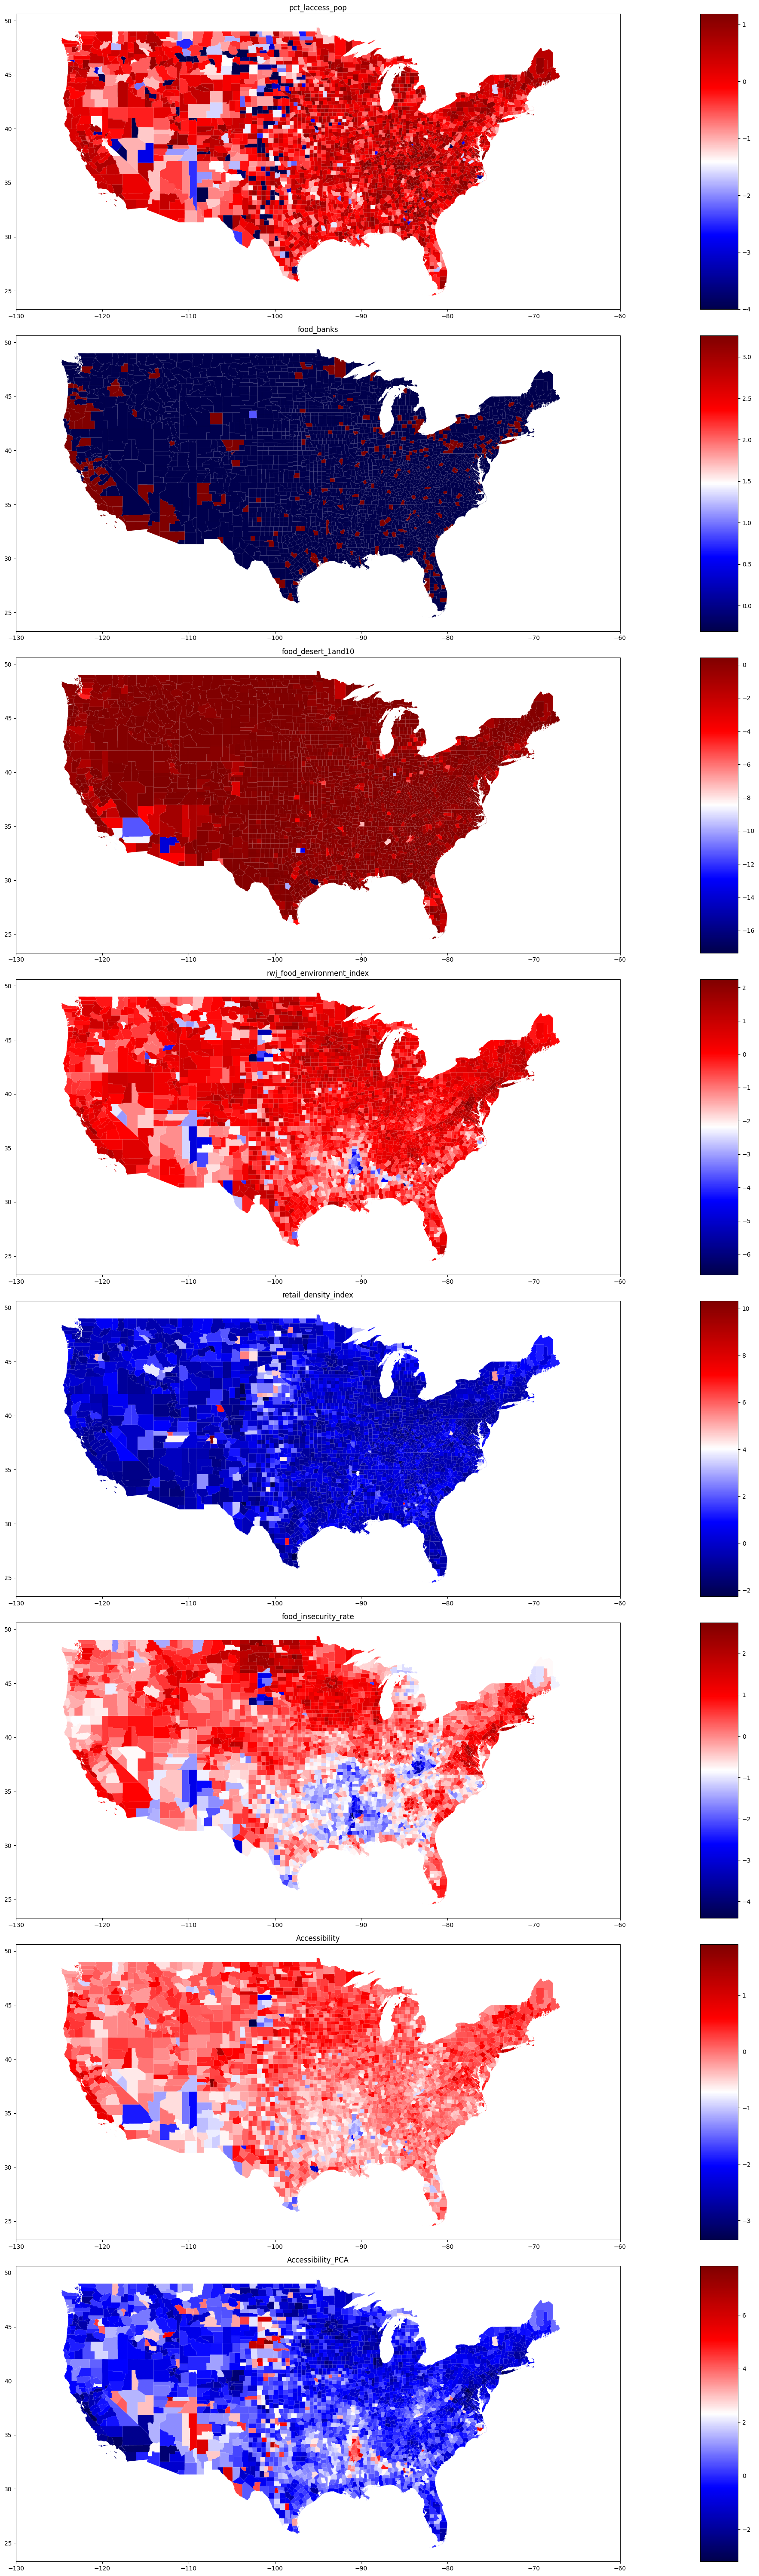

In [35]:
# fig, axs = plt.subplots(len(index_dict["Accessibility"]) + 2, figsize=(40, 60))

# for i, column in enumerate(index_dict["Accessibility"] + ["Accessibility", "Accessibility_PCA"]):
#     data = gdf[["geometry", column]]
#     ax = axs[i]
#     data.plot(column=column, ax=ax, cmap="seismic")
#     ax.set_title(column)
#     x_min = -130
#     x_max = -60
#     ax.set_xlim(x_min, x_max)

#     # Create a separate axis for the colorbar
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)
    
#     # Plot the colorbar
#     vmin, vmax = data[column].min(), data[column].max()
#     sm = plt.cm.ScalarMappable(cmap="seismic", norm=plt.Normalize(vmin=vmin, vmax=vmax))
#     sm.set_array([])
#     fig.colorbar(sm, cax=cax)
    
# plt.tight_layout()
# plt.show()

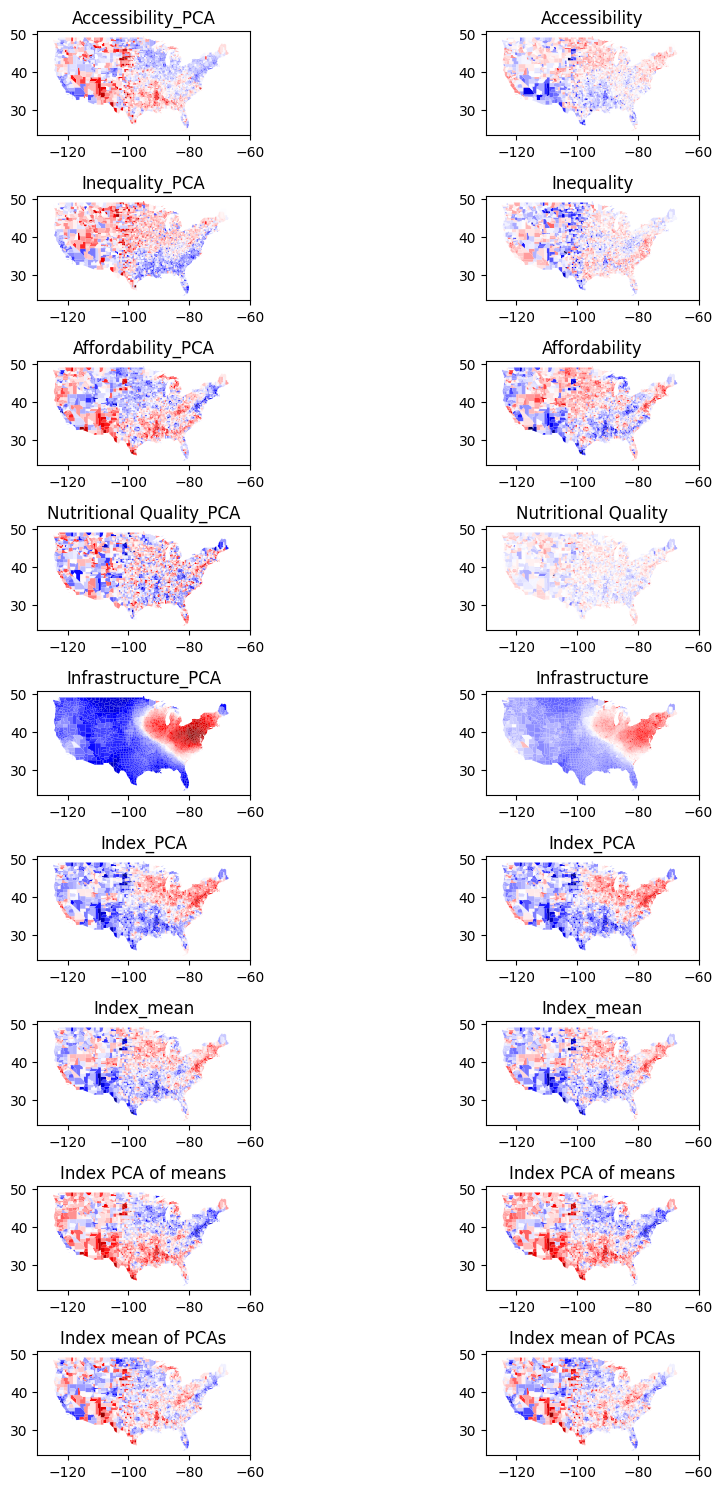

In [36]:
columns = ["Accessibility_PCA", "Inequality_PCA", "Affordability_PCA",
          "Nutritional Quality_PCA", "Infrastructure_PCA"]

fig, axs = plt.subplots(len(columns), 2, figsize=(10, 15))

for i, column in enumerate(columns):
    data = gdf[["geometry", column]]
    #data.plot(color="k", alpha=0.3 ,ax=axs[i][0])
    max_ = max(abs(min(data[column])), abs(max(data[column])))
    data.plot(column=column, ax=axs[i][0], cmap="seismic", vmin = -max_, vmax = max_)
    axs[i][0].set_title(column)
    x_min = -130
    x_max = -60
    axs[i][0].set_xlim(x_min, x_max)
    
columns = ["Accessibility", "Inequality", "Affordability",
          "Nutritional Quality", "Infrastructure"]
    
for i, column in enumerate(columns):
    data = gdf[["geometry", column]]
    #data.plot(color="k", alpha=0.3 ,ax=axs[i][1])
    max_ = max(abs(min(data[column])), abs(max(data[column])))
    data.plot(column=column, ax=axs[i][1], cmap="seismic", vmin = -max_, vmax = max_)
    axs[i][1].set_title(column)
    x_min = -130
    x_max = -60
    axs[i][1].set_xlim(x_min, x_max)

plt.tight_layout()
plt.show()

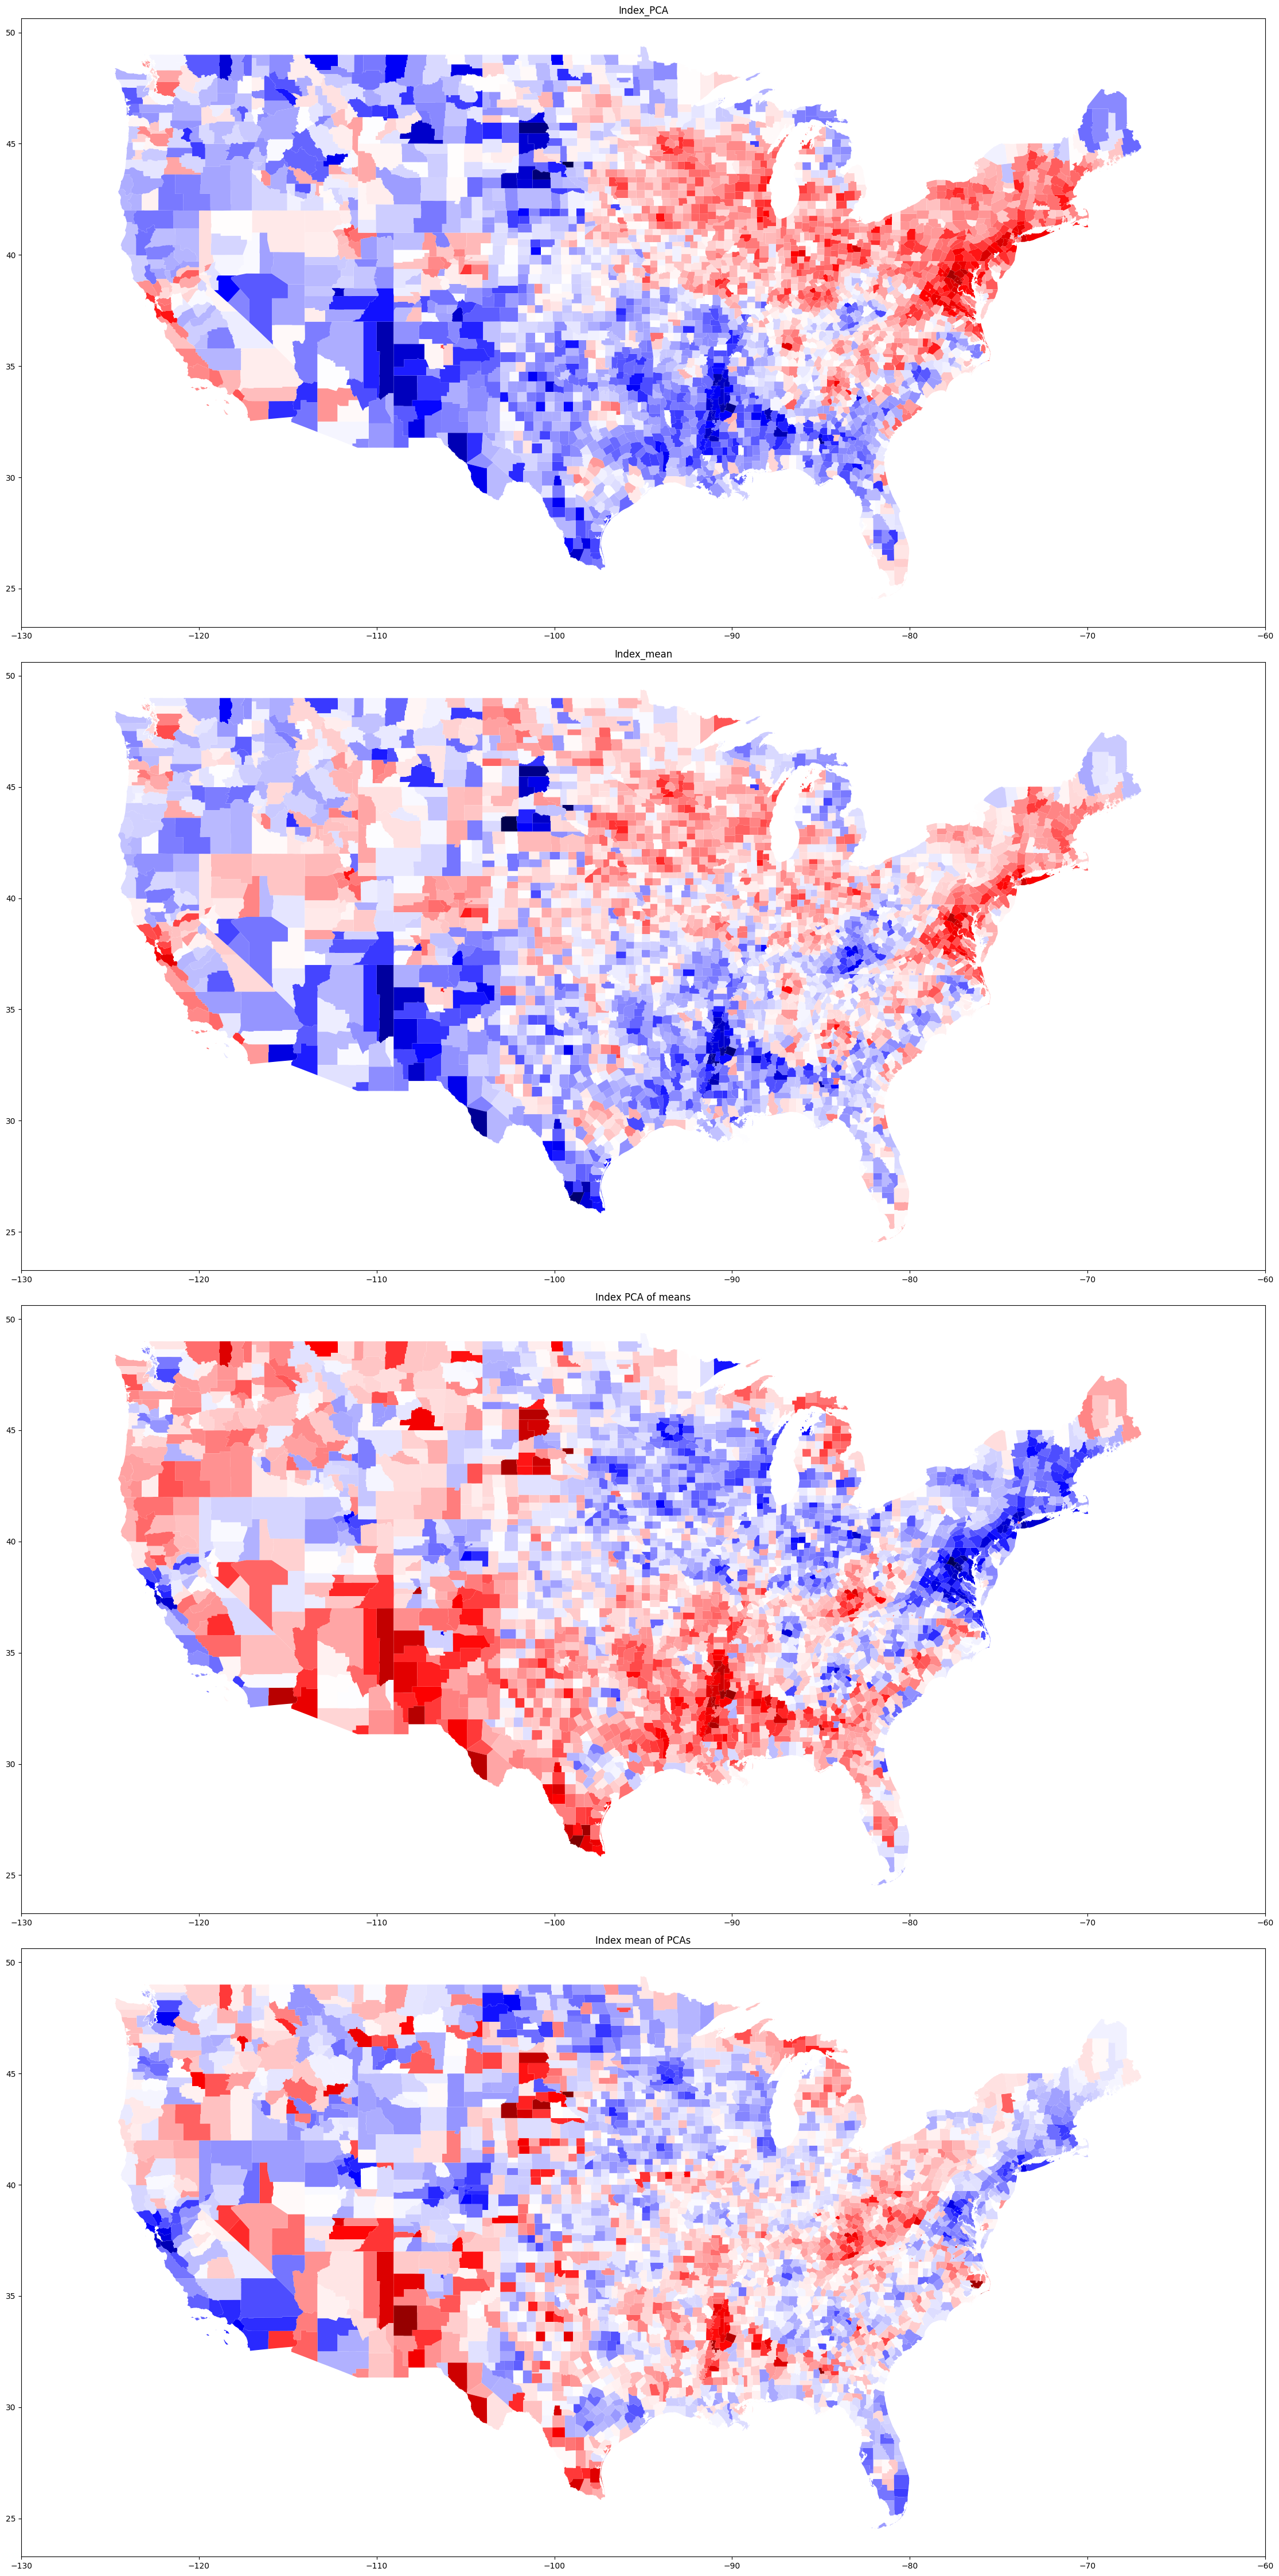

In [37]:
columns = ["Index_PCA", "Index_mean", "Index PCA of means", "Index mean of PCAs"]

fig, axs = plt.subplots(len(columns), 1, figsize=(30, 45))
for i, column in enumerate(columns):
    data = gdf[["geometry", column]]
    #data.plot(color="k", alpha=0.3 ,ax=axs[i][1])
    max_ = max(abs(min(data[column])), abs(max(data[column])))
    data.plot(column=column, ax=axs[i], cmap="seismic", vmin = -max_, vmax = max_)
    axs[i].set_title(column)
    x_min = -130
    x_max = -60
    axs[i].set_xlim(x_min, x_max)

plt.tight_layout()
plt.show()

In [38]:
#This is that one small county with really large values
imputed_df.loc["08111"]

variable_name
below_poverty_level_percent_civilian_labor_force_16_years_and_over                                            -0.161069
convspth                                                                                                      -2.818441
d2c_intermediated_p                                                                                           -0.482081
ffrpth                                                                                                       -17.065177
fmrktpth                                                                                                      -0.590398
food_banks                                                                                                    -0.307245
food_desert_1and10                                                                                             0.291798
food_insecurity_rate                                                                                           0.724539
health_factors            

In [39]:
imputed_df.corr()

C:\Users\hthog\AppData\Local\Temp\ipykernel_15564\1145662547.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  imputed_df.corr()


variable_name                                       below_poverty_level_percent_civilian_labor_force_16_years_and_over  \
variable_name                                                                                                            
below_poverty_level_percent_civilian_labor_forc...                                           1.000000                    
convspth                                                                                     0.158466                    
d2c_intermediated_p                                                                          0.108461                    
ffrpth                                                                                       0.023406                    
fmrktpth                                                                                     0.080892                    
food_banks                                                                                  -0.010409                    
food_desert_1and10                                                                           0.057413                    
food_insecurity_rate                                                                         0.679089                    
health_factors                                                                               0.417194                    
health_outcomes                                                                              0.357576                    
pct_laccess_pop                                                                             -0.039385                    
retail_density_index                                                                        -0.080510                    
rwj_food_environment_index                                                                   0.549536                    
specspth                                                                                     0.111817                    
college_region                                                                               0.068767                    
csa_region                                                                                   0.177351                    
fm_region                                                                                    0.127272                    
fh_region                                                                                    0.109580                    
mp_region                                                                                    0.131066                    
Income                                                                                       0.608001                    
Unemployment                                                                                 0.356819                    
SNAP Inequality                                                                             -0.085360                    
LAccess Inequality                                                                          -0.098435                    
Gini                                                                                         0.447106                    
Accessibility                                                                                0.454017                    
Inequality                                                                                   0.160990                    
Affordability                                                                                0.829967                    
Nutritional Quality                                                                          0.389440                    
Infrastructure                                                                               0.165165                    
Index                                                                                        0.654870                    
Accessibility_PCA                                                                           -0.4